https://www.cvxpy.org/examples/basic/quadratic_program.html

In [ ]:
pip install cvxpy

Example 1:  ell-2 norm minimization

In [ ]:
###ell-2 norm minimization

# Import packages.
import cvxpy as cp
import numpy as np

# Generate data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A @ x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A @ x - b, p=2).value)


The optimal value is 7.005909828287484
The optimal x is
[ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is  2.6468679280023557


Example 2: Quadratic program
Minimize 0.5*x'Px  +q'*x  s.t. GX<=h  and AX=b

In [ ]:
###Quadratic program

# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial quadratic program.
m = 15
n = 10
p = 5
np.random.seed(1)
P = np.random.randn(n, n)
P = P.T @ P
q = np.random.randn(n)
G = np.random.randn(m, n)
h = G @ np.random.randn(n)
A = np.random.randn(p, n)
b = np.random.randn(p)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
                 [G @ x <= h,
                  A @ x == b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 86.89141585569907
A solution x is
[-1.68244521  0.29769913 -2.38772183 -2.79986015  1.18270433 -0.20911897
 -4.50993526  3.76683701 -0.45770675 -3.78589638]
A dual solution corresponding to the inequality constraints is
[ 0.          0.          0.          0.          0.         10.45538054
  0.          0.          0.         39.67365045  0.          0.
  0.         20.79927156  6.54115873]


Example 3: Matrix completion by Spectral radius minimization.

Suppose we know some entries of a matrix (e.g., what movies (rows) different users (columns) like.  How can we guess the missing entries?

Idea: Find the matrix with the smallest spectral norm which matches the data, and some additional constraints.

https://www.cvxpy.org/examples/dgp/pf_matrix_completion.html

In [ ]:
##Minimize Perron-Frobenius norm (i.e., spectral norm, the largest eigenvalue) of a matrix

import cvxpy as cp

n = 3
known_value_indices = tuple(zip(*[[0, 0], [0, 2], [1, 1], [2, 0], [2, 1]]))
known_values = [1.0, 1.9, 0.8, 3.2, 5.9]
X = cp.Variable((n, n), pos=True)
objective_fn = cp.pf_eigenvalue(X)#cp.pf_eigenvalue(X)
constraints = [
  X[known_value_indices] == known_values,
  X[0, 1] * X[1, 0] * X[1, 2] * X[2, 2] == 1.0,
]
problem = cp.Problem(cp.Minimize(objective_fn), constraints)
problem.solve(gp=True)
print("Optimal value: ", problem.value)
print("X:\n", X.value)

Optimal value:  4.70237420683113
X:
 [[1.         4.63616907 1.9       ]
 [0.49991744 0.8        0.37774148]
 [3.2        5.9        1.14221476]]


Example 3: An Optimal control problem:  Try to control a rocket so that it lands at the right location at some time T using the "most efficient" or "smoothest" path.

## https://nbviewer.jupyter.org/github/cvxgrp/cvx_short_course/blob/master/intro/control.ipynb

In [ ]:
## Optimal control

# Generate data for control problem.
import numpy as np
np.random.seed(1)
n = 8
m = 2
T = 50
alpha = 0.2
beta = 5
A = np.eye(n) + alpha*np.random.randn(n,n)
B = np.random.randn(n,m)
x_0 = beta*np.random.randn(n)

In [ ]:
# Form and solve control problem.
import cvxpy as cp


x = cp.Variable((n, T+1))
u = cp.Variable((m, T))

cost = 0
constr = []
for t in range(T):
    cost += cp.sum_squares(x[:,t+1]) + cp.sum_squares(u[:,t])
    constr += [x[:,t+1] == A@x[:,t] + B@u[:,t],
               cp.norm(u[:,t], 'inf') <= 1]
# sums problem objectives and concatenates constraints.
constr += [x[:,T] == 0, x[:,0] == x_0]
problem = cp.Problem(cp.Minimize(cost), constr)
problem.solve(solver=cp.ECOS)

64470.57722638684

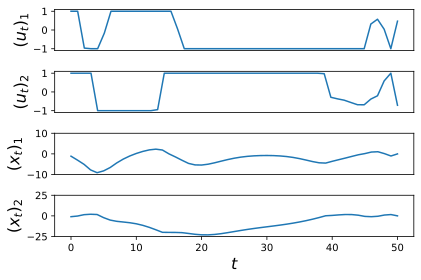

In [ ]:
# Plot results.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()

# Plot (u_t)_1.
ax = f.add_subplot(411)
plt.plot(u[0,:].value)
plt.ylabel(r"$(u_t)_1$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.xticks([])

# Plot (u_t)_2.
plt.subplot(4,1,2)
plt.plot(u[1,:].value)
plt.ylabel(r"$(u_t)_2$", fontsize=16)
plt.yticks(np.linspace(-1, 1, 3))
plt.xticks([])

# Plot (x_t)_1.
plt.subplot(4,1,3)
x1 = x[0,:].value
plt.plot(x1)
plt.ylabel(r"$(x_t)_1$", fontsize=16)
plt.yticks([-10, 0, 10])
plt.ylim([-10, 10])
plt.xticks([])

# Plot (x_t)_2.
plt.subplot(4,1,4)
x2 = x[1,:].value
plt.plot(range(51), x2)
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$(x_t)_2$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.tight_layout()
plt.show()

#Example 4: Portfolio optimization

https://nbviewer.jupyter.org/github/cvxgrp/cvx_short_course/blob/master/applications/portfolio_optimization.ipynb

In [ ]:
# Generate data for long only portfolio optimization.
import numpy as np
np.random.seed(1)
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)

In [ ]:
# Long only portfolio optimization.
import cvxpy as cp


w = cp.Variable(n)
gamma = cp.Parameter(nonneg=True)
ret = mu.T*w 
risk = cp.quad_form(w, Sigma)
prob = cp.Problem(cp.Maximize(ret - gamma*risk), 
               [cp.sum(w) == 1, 
                w >= 0])

In [ ]:
# Compute trade-off curve.
SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = cp.sqrt(risk).value
    ret_data[i] = ret.value

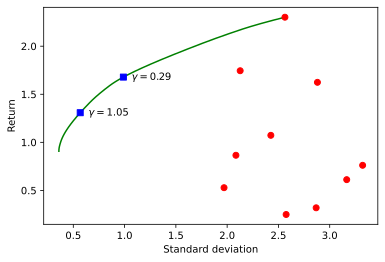

In [ ]:
# Plot long only trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
for marker in markers_on:
    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
for i in range(n):
    plt.plot(cp.sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

Example 5: Support vector machine

https://nbviewer.jupyter.org/github/cvxgrp/cvx_short_course/blob/master/intro/SVM.ipynb

In [ ]:
# Generate data for SVM classifier with L1 regularization.
from __future__ import division
import numpy as np
np.random.seed(1)
n = 20
m = 1000
TEST = m
DENSITY = 0.2
beta_true = np.random.randn(n,1)
idxs = np.random.choice(range(n), int((1-DENSITY)*n), replace=False)
for idx in idxs:
    beta_true[idx] = 0
offset = 0
sigma = 45
X = np.random.normal(0, 5, size=(m,n))
Y = np.sign(X.dot(beta_true) + offset + np.random.normal(0,sigma,size=(m,1)))
X_test = np.random.normal(0, 5, size=(TEST,n))
Y_test = np.sign(X_test.dot(beta_true) + offset + np.random.normal(0,sigma,size=(TEST,1)))

In [ ]:
# Form SVM with L1 regularization problem.
import cvxpy as cp

beta = cp.Variable((n, 1))
v = cp.Variable()
loss = cp.sum(cp.pos(1 - cp.multiply(Y, X*beta - v)))
reg = cp.norm(beta, 1)
lambd = cp.Parameter(nonneg=True)
prob = cp.Problem(cp.Minimize(loss/m + lambd*reg))

In [ ]:
# Compute a trade-off curve and record train and test error.
TRIALS = 100
train_error = np.zeros(TRIALS)
test_error = np.zeros(TRIALS)
lambda_vals = np.logspace(-2, 0, TRIALS)
beta_vals = []
for i in range(TRIALS):
    lambd.value = lambda_vals[i]
    prob.solve()
    train_error[i] = (np.sign(X.dot(beta_true) + offset) != np.sign(X.dot(beta.value) - v.value)).sum()/m
    test_error[i] = (np.sign(X_test.dot(beta_true) + offset) != np.sign(X_test.dot(beta.value) - v.value)).sum()/TEST
    beta_vals.append(beta.value)

In [ ]:
# Plot the train and test error over the trade-off curve.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.plot(lambda_vals, train_error, label="Train error")
plt.plot(lambda_vals, test_error, label="Test error")
plt.xscale('log')
plt.legend(loc='upper left')
plt.xlabel(r"$\lambda$", fontsize=16)
plt.show()

Example 6:  Total variation in-painting
(Find the image with the least-sharp edges which matches the data.  The more sharp edges an image has, the more "messy" it is.  We want to find the simplest image that matches the data)

  https://www.cvxpy.org/examples/applications/tv_inpainting.html

In [ ]:
Example 7:  Robust Kalman filter for vehicle tracking

(Kalman filter can be solved with basic linear Algebra. Robust Kalman Filter can be solved with convex optimization.  )

https://www.cvxpy.org/examples/applications/robust_kalman.html